In [1]:
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/home/rk/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import pandas_datareader.data as web
import datetime

In [5]:
st = datetime.datetime(2014,1,1)
en = datetime.date.today()

In [6]:
apple_stocks=web.DataReader("AAPL", 'google', st, en)

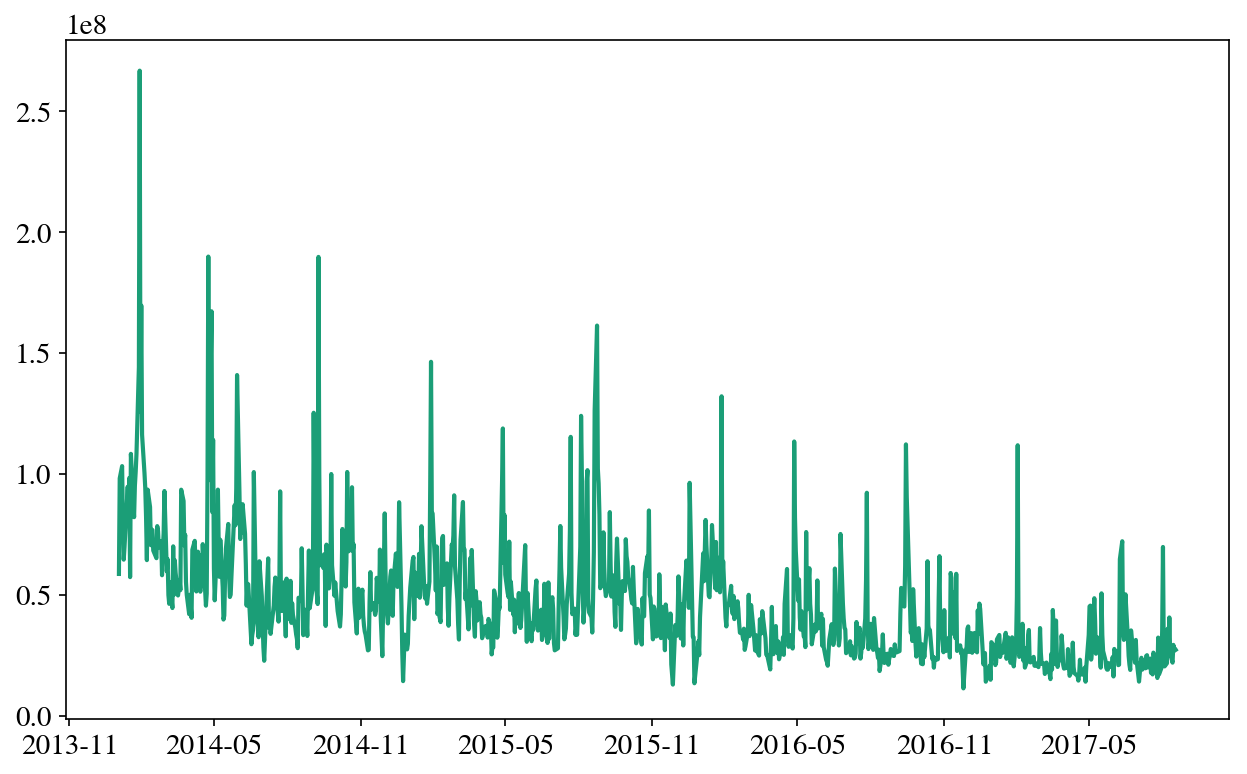

In [7]:
plt.plot(apple_stocks['Volume'])
plt.show()

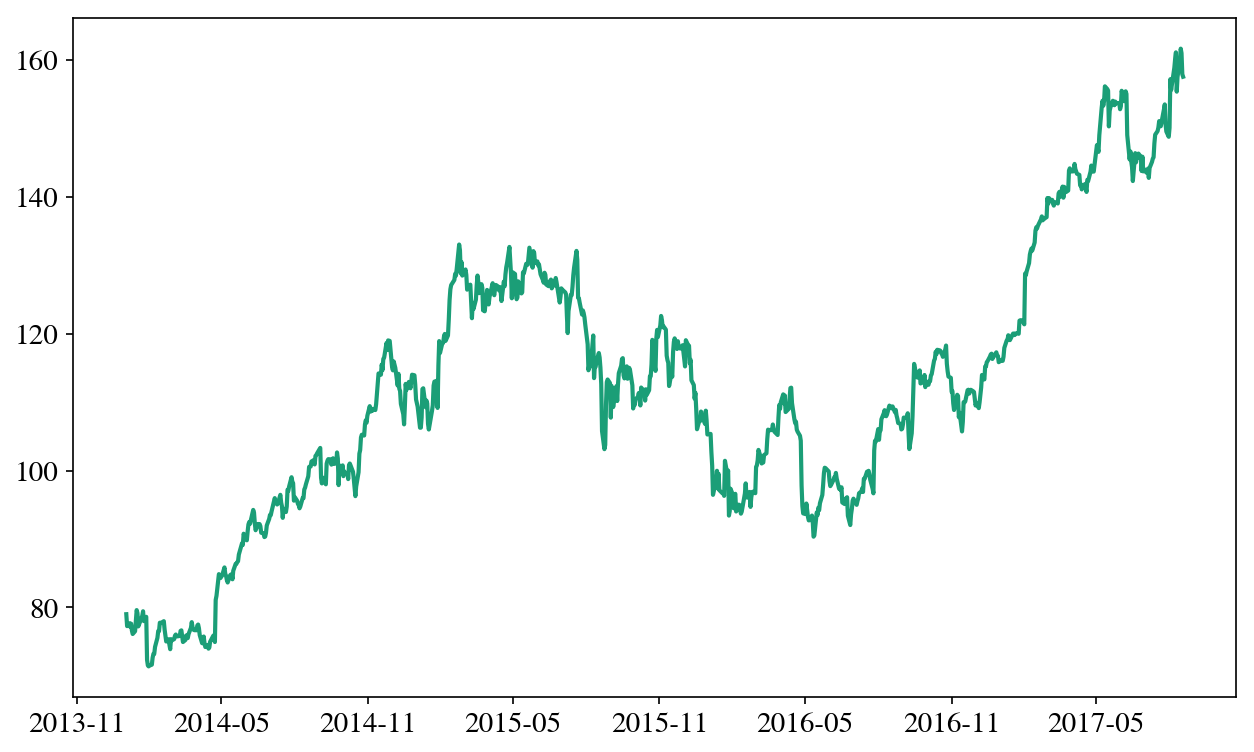

In [8]:
plt.plot(apple_stocks['Close'])
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #rolling stats
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #plot rolling stats
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #dickey fuller test
    try:
        print 'Results of Dickey-Fuller Test:'
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print dfoutput
    except:
        print("svd not converging")

/home/rk/anaconda/envs/py27/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/home/rk/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/rk/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


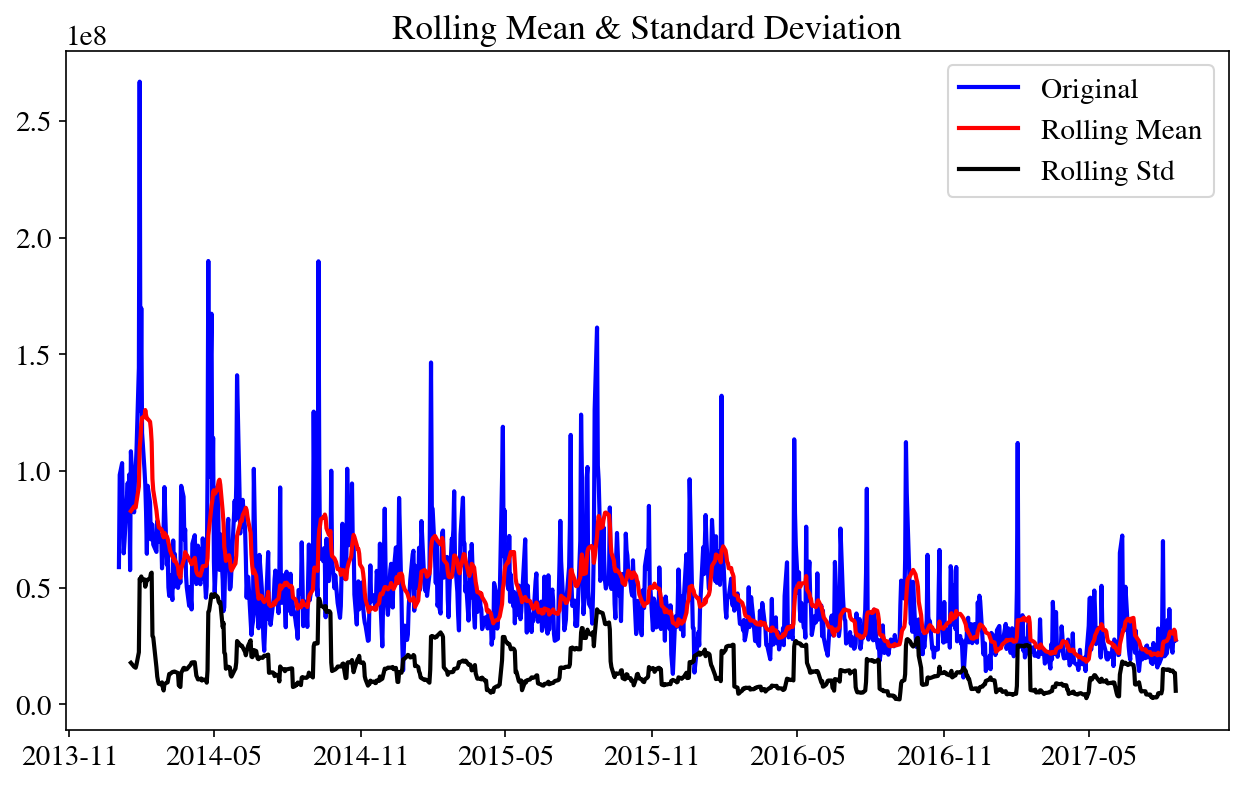

Results of Dickey-Fuller Test:
Test Statistic                  -5.103282
p-value                          0.000014
#Lags Used                       7.000000
Number of Observations Used    907.000000
Critical Value (5%)             -2.864732
Critical Value (1%)             -3.437580
Critical Value (10%)            -2.568470
dtype: float64


In [11]:
test_stationarity(apple_stocks['Volume'])

/home/rk/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/rk/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


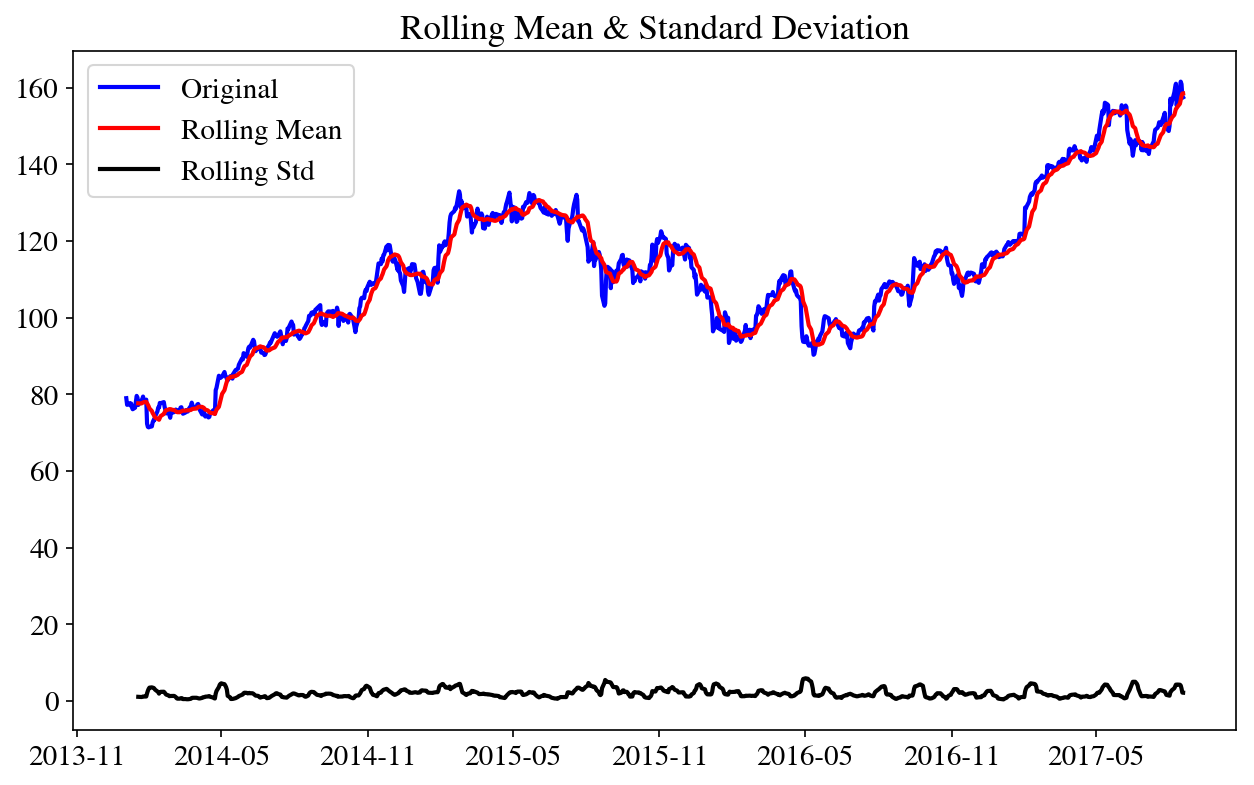

Results of Dickey-Fuller Test:
Test Statistic                  -0.707282
p-value                          0.844854
#Lags Used                       0.000000
Number of Observations Used    914.000000
Critical Value (5%)             -2.864707
Critical Value (1%)             -3.437525
Critical Value (10%)            -2.568457
dtype: float64


In [12]:
test_stationarity(apple_stocks['Close'])

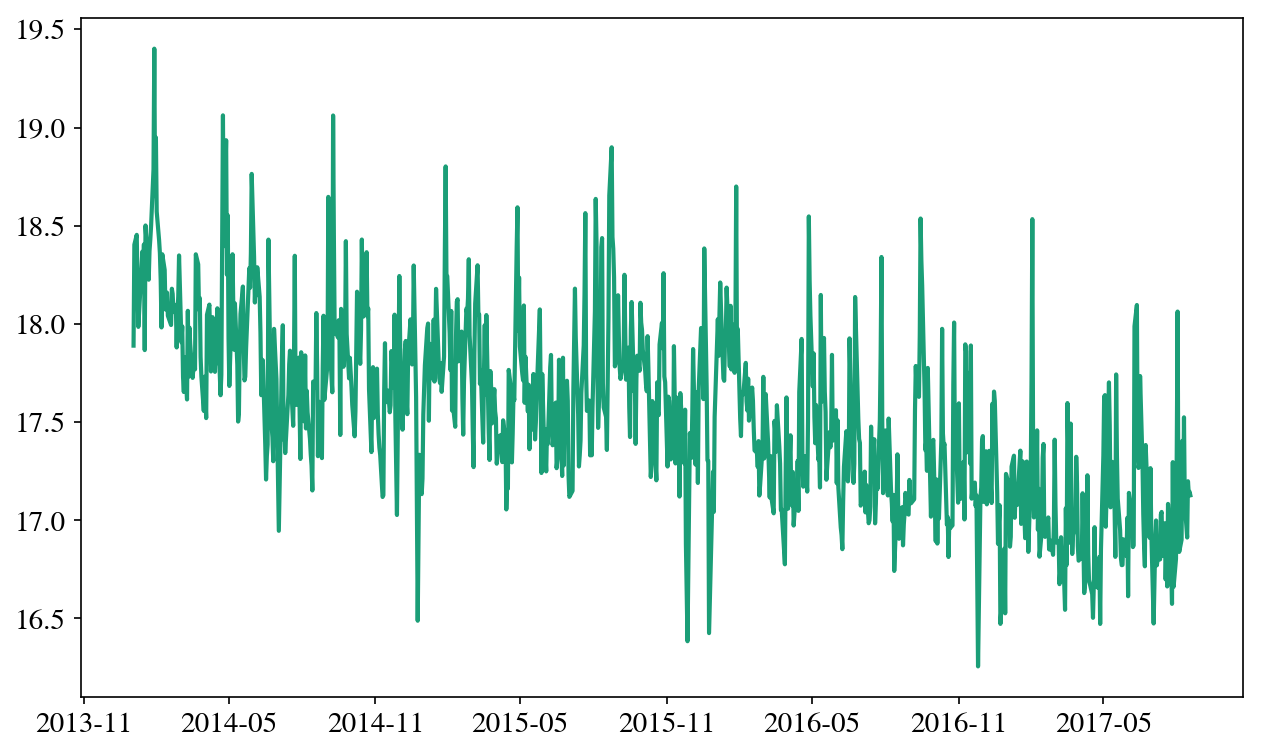

In [14]:
plt.plot(np.log(apple_stocks['Volume']))
plt.show()

/home/rk/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/rk/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


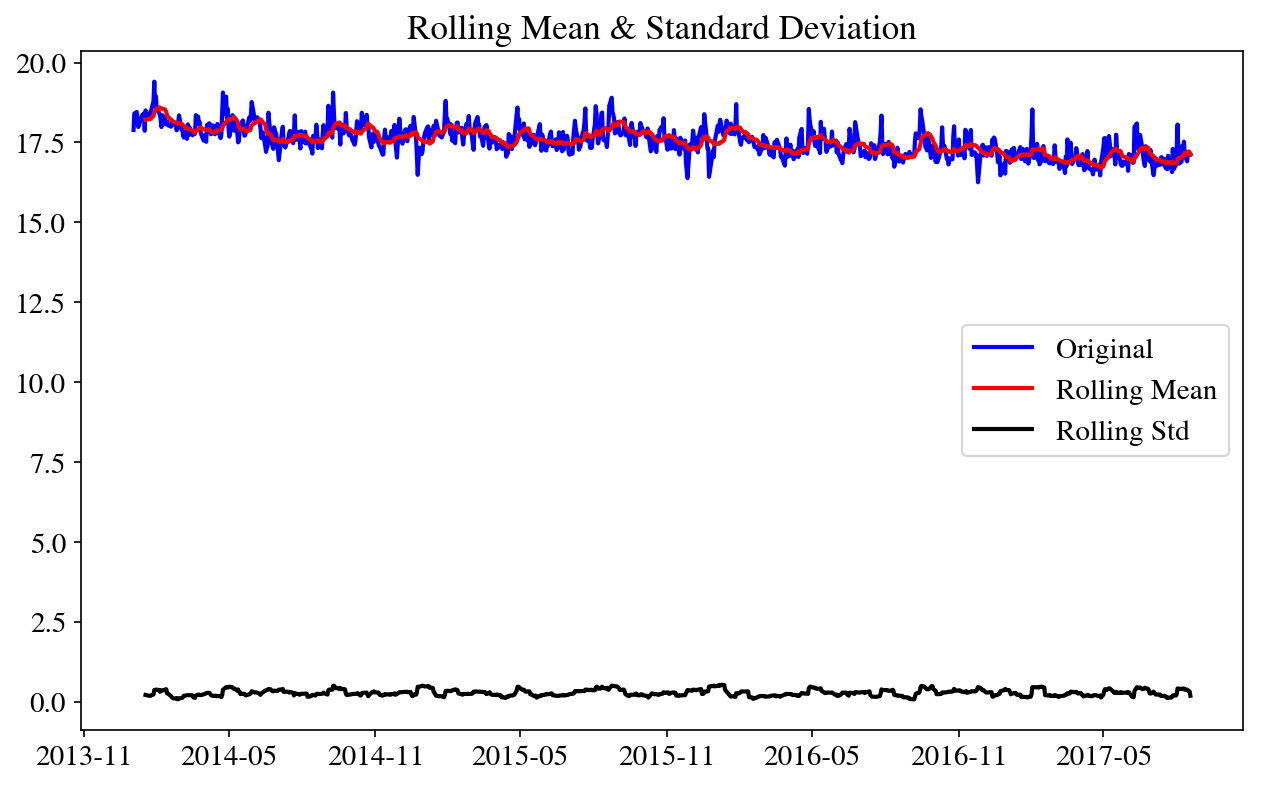

Results of Dickey-Fuller Test:
Test Statistic                  -3.965513
p-value                          0.001602
#Lags Used                       9.000000
Number of Observations Used    905.000000
Critical Value (5%)             -2.864739
Critical Value (1%)             -3.437596
Critical Value (10%)            -2.568473
dtype: float64


In [15]:
test_stationarity(np.log(apple_stocks['Volume']))

/home/rk/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
  from ipykernel import kernelapp as app


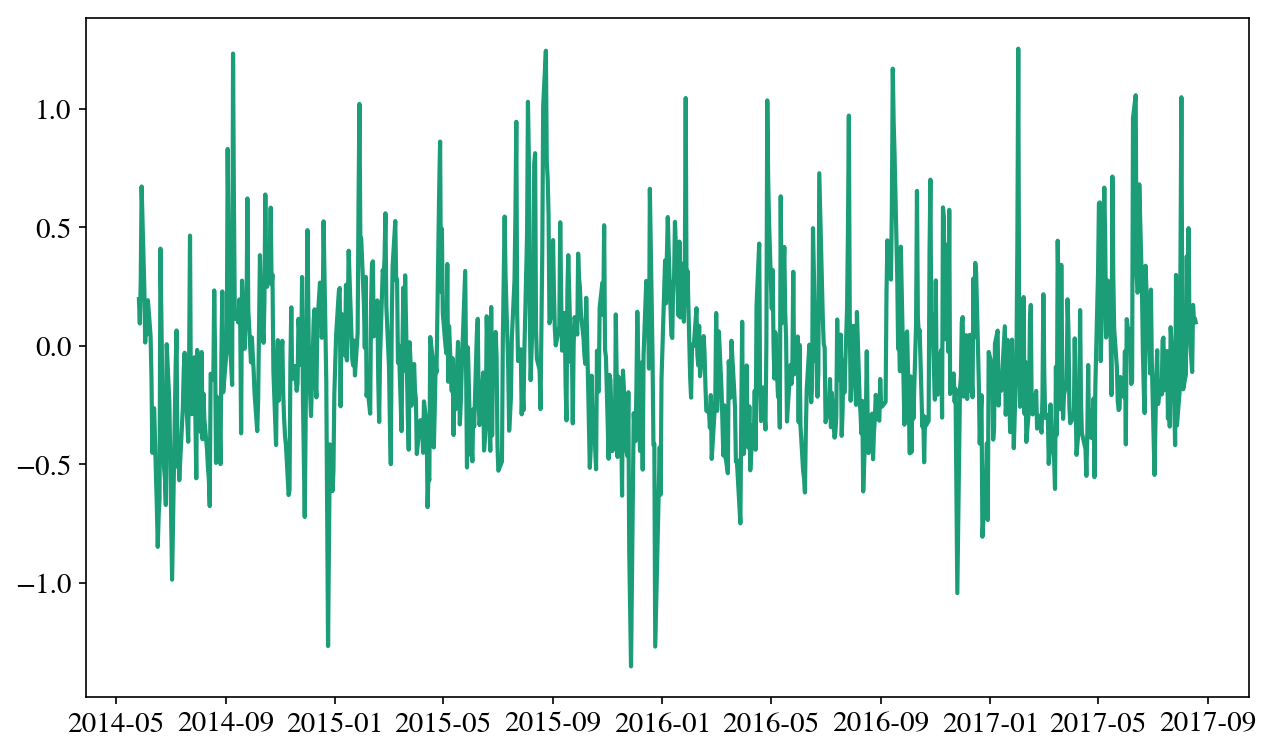

In [16]:
#plotting stationarity of time series
plt.plot(np.log(apple_stocks['Volume'])-pd.rolling_mean(np.log(apple_stocks['Volume']),100))
plt.show()

/home/rk/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=100,ignore_na=False,min_periods=0,adjust=True).mean()
  from ipykernel import kernelapp as app


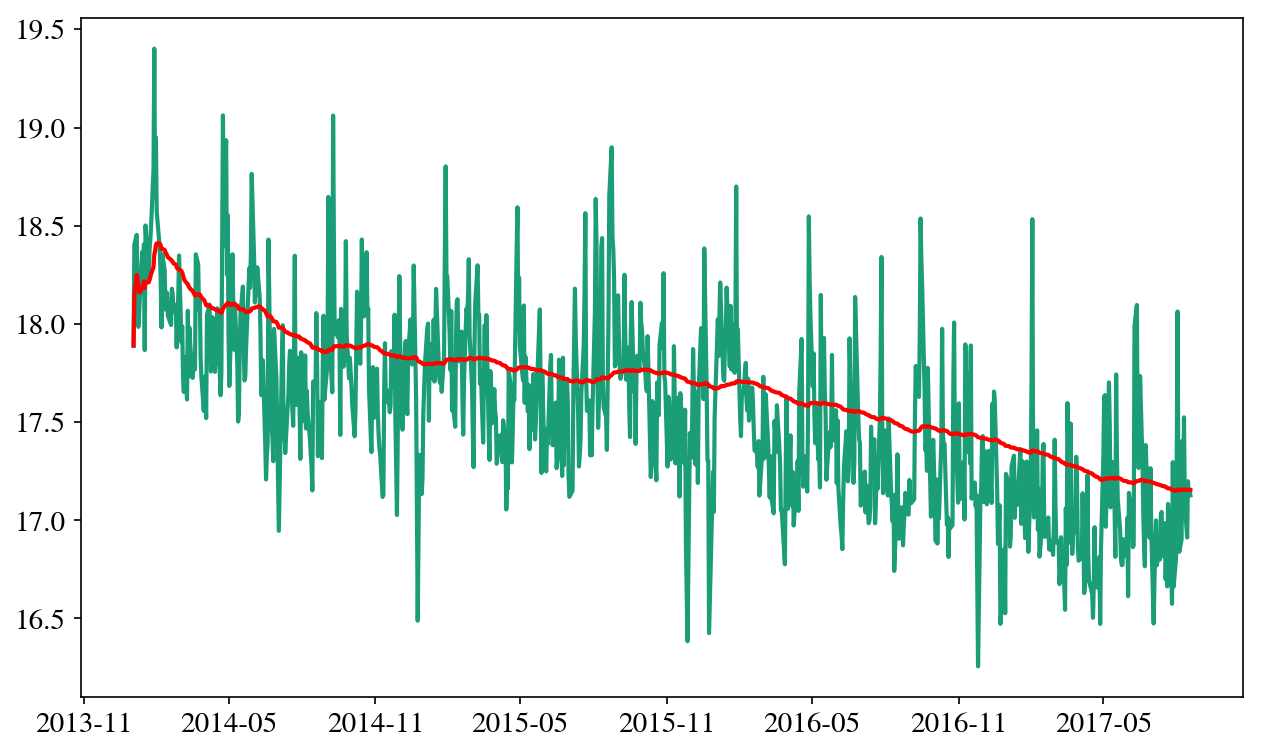

In [17]:
data_log=np.log(apple_stocks['Volume'])
expwghted_avg = pd.ewma(data_log, halflife=100)
plt.plot(data_log)
plt.plot(expwghted_avg, color='red')
plt.show()

/home/rk/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/rk/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


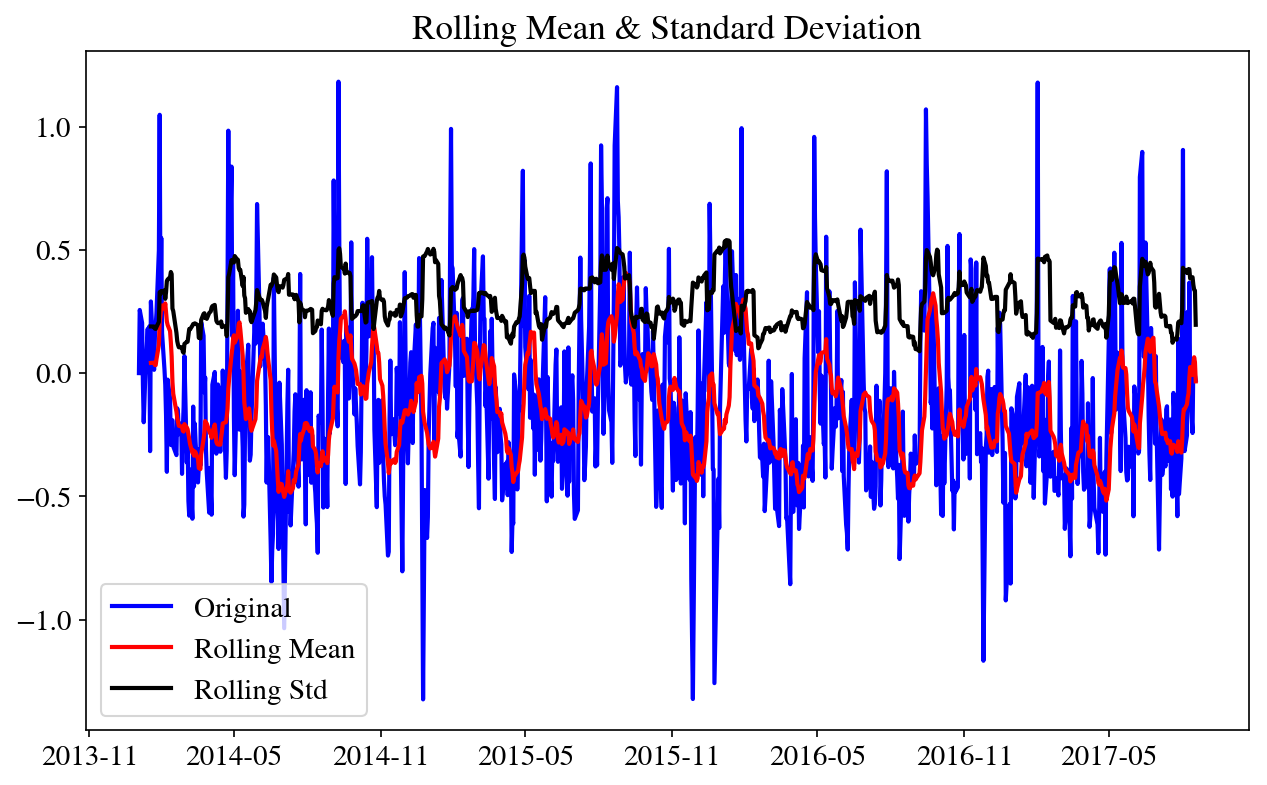

Results of Dickey-Fuller Test:
Test Statistic                -1.158097e+01
p-value                        2.943630e-21
#Lags Used                     2.000000e+00
Number of Observations Used    9.120000e+02
Critical Value (5%)           -2.864714e+00
Critical Value (1%)           -3.437541e+00
Critical Value (10%)          -2.568460e+00
dtype: float64


In [18]:
test_stationarity(data_log-expwghted_avg)

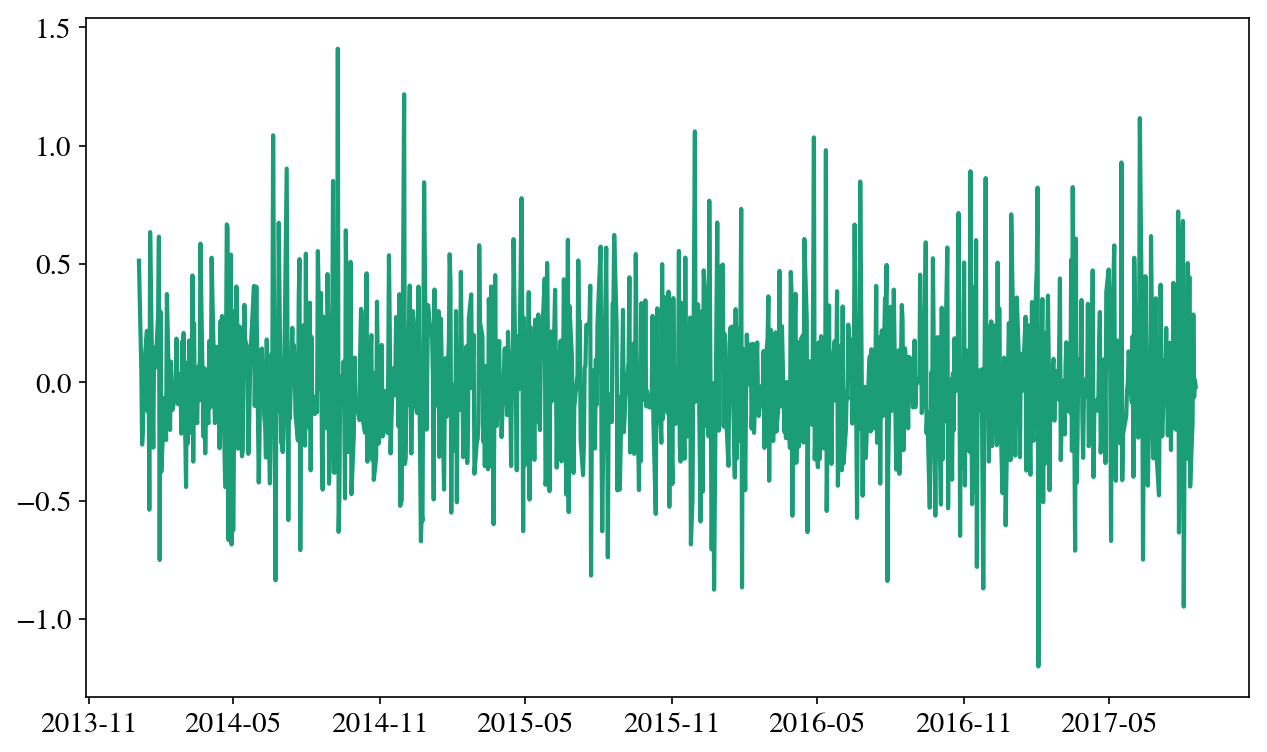

In [19]:
#differencing
plt.plot(data_log-data_log.shift())
plt.show()


/home/rk/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/rk/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


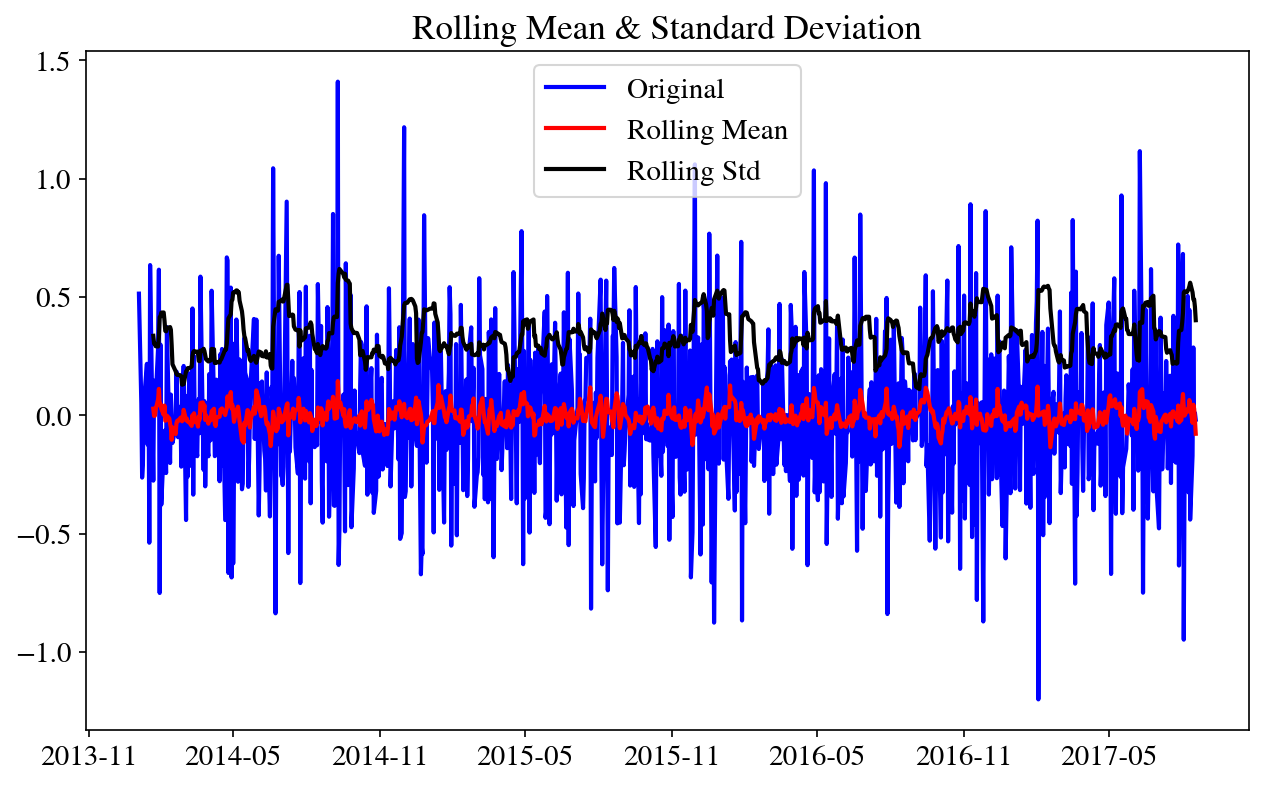

Results of Dickey-Fuller Test:
svd not converging


In [20]:
data_log_diff=(data_log-data_log.shift())
data_log.dropna(inplace=True)
test_stationarity(data_log_diff)

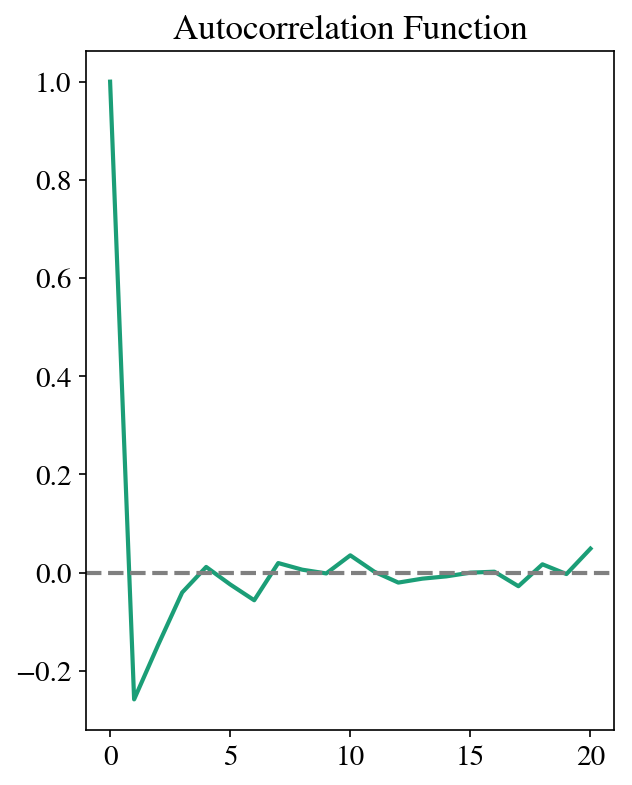

In [25]:
from statsmodels.tsa.stattools import acf, pacf
data_log_diff=data_log-data_log.shift()
data_log_diff.dropna(inplace=True)
lag_acf = acf(data_log_diff, nlags=20)
lag_pacf = pacf(data_log_diff, nlags=20, method='ols')
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.title('Autocorrelation Function')

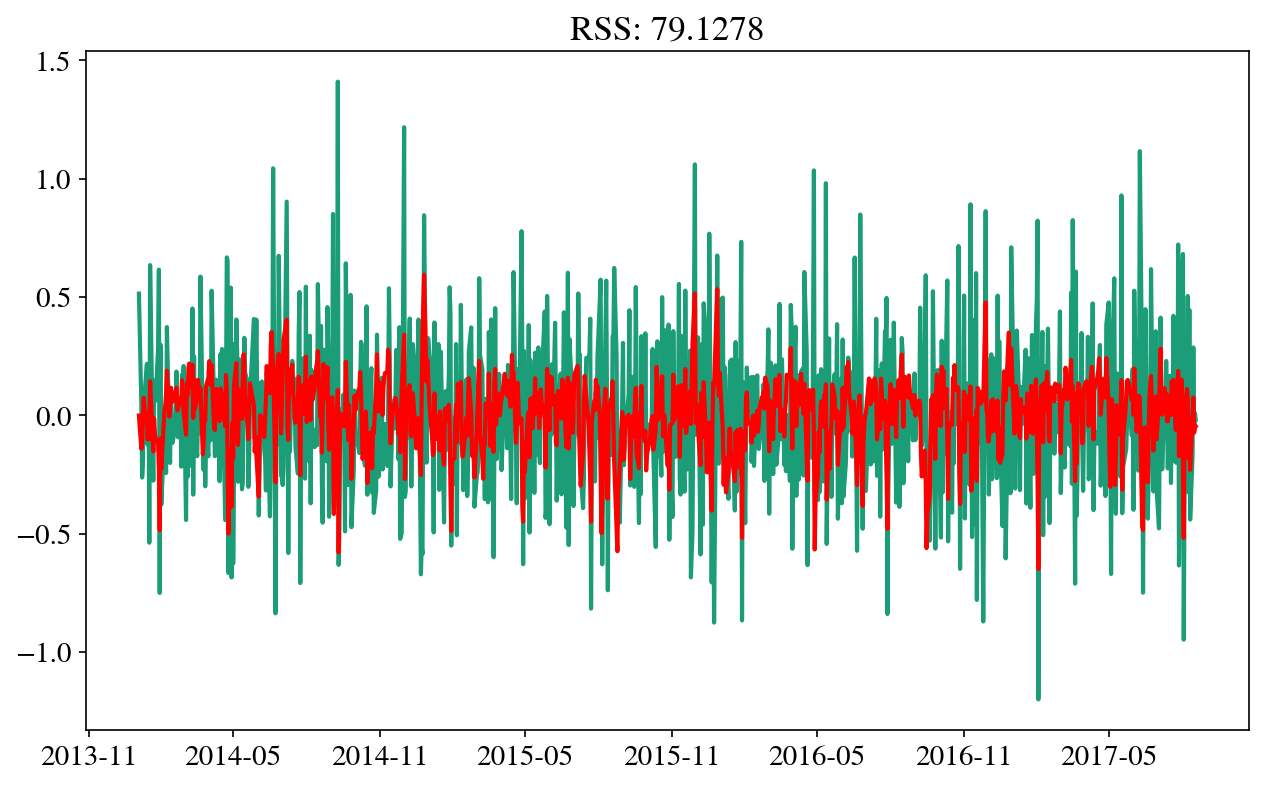

In [26]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(data_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-data_log_diff)**2))
plt.show()

In [27]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(data_log.ix[0], index=data_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

/home/rk/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [31]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)